# Compiling Open Graphs to Fusion Networks

Here we should how to compile an open graph into a fusion network comprised of linear resource states.

First we create an initial graph.

In [1]:
import networkx as nx
from optyx.compiler import OpenGraph, Measurement
from graphix.pauli import Plane

/Users/williamcashman/code/optyx/.venv/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


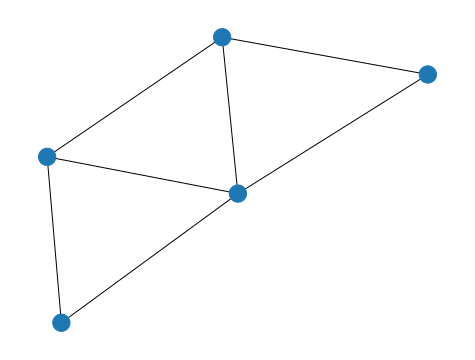

In [2]:
g = nx.Graph([(0, 1), (0, 2), (2, 1), (0, 3), (2, 3), (3, 4), (2, 4)])
meas = {i: Measurement(i, Plane.XY) for i in range (4)}
inputs = [0]
outputs = [4]

og = OpenGraph(g, meas, inputs, outputs)

nx.draw(g)

We then use `open_graph_to_linear_fusion_network` to convert the open graph to a fusion network.

In [3]:
from optyx.compiler.semm import open_graph_to_linear_fusion_network

fn = open_graph_to_linear_fusion_network(og, 4)
print("Linear resource states", fn.resources)
print("Measurements", fn.measurements)
print("Fusions", fn.fusions)

Linear resource states [[0, 1, 2, 5, 3], [6, 4, 7]]
Measurements {0: Measurement(angle=0, plane=<Plane.XY: 0>), 1: Measurement(angle=1, plane=<Plane.XY: 0>), 2: Measurement(angle=2, plane=<Plane.XY: 0>), 3: Measurement(angle=3, plane=<Plane.XY: 0>)}
Fusions [Fusion(node1=2, node2=3, fusion_type='Y'), Fusion(node1=5, node2=0, fusion_type='X'), Fusion(node1=6, node2=2, fusion_type='X'), Fusion(node1=7, node2=3, fusion_type='X')]


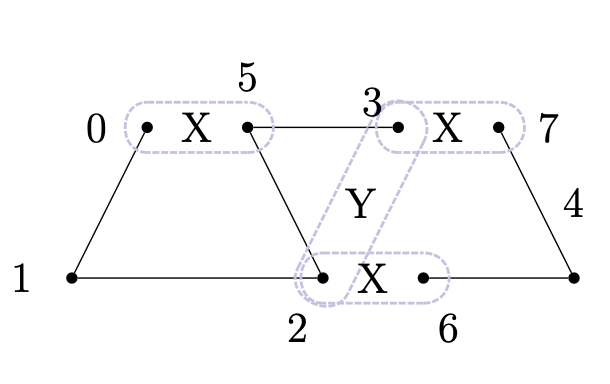